<a href="https://colab.research.google.com/github/Raahul-Raj/Dating-App-Premium-Prediction/blob/main/Text_to_Image_generation_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip show diffusers
!pip install --upgrade diffusers






NotImplementedError: A UTF-8 locale is required. Got ANSI_X3.4-1968

In [4]:
import locale
def getpreferredencoding(do_setlocale = True):
    return "UTF-8"
locale.getpreferredencoding = getpreferredencoding
!pip show diffusers
!pip install --upgrade diffusers

Name: diffusers
Version: 0.30.3
Summary: State-of-the-art diffusion in PyTorch and JAX.
Home-page: https://github.com/huggingface/diffusers
Author: The Hugging Face team (past and future) with the help of all our contributors (https://github.com/huggingface/diffusers/graphs/contributors)
Author-email: diffusers@huggingface.co
License: Apache 2.0 License
Location: /usr/local/lib/python3.10/dist-packages
Requires: filelock, huggingface-hub, importlib-metadata, numpy, Pillow, regex, requests, safetensors
Required-by: 
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 47.6 MB/s eta 0:00:00
  Attempting uninstall: diffusers
    Found existing installation: diffusers 0.30.3
    Uninstalling diffusers-0.30.3:
      Successfully uninstalled diffusers-0.30.3


In [5]:
from diffusers import StableDiffusionPipeline
import torch
from PIL import Image
import os

def generate_image(prompt, output_path="generated_image.png"):
    # Load the Stable Diffusion pipeline
    # Note: If 'use_auth_token' warning appears, ensure your environment is set up correctly with the HF token.
    pipeline = StableDiffusionPipeline.from_pretrained(
        "CompVis/stable-diffusion-v1-4",
        use_auth_token="your_hugging_face_token"  # Replace this with your actual Hugging Face token
    )

    # Move the pipeline to GPU if available for faster inference
    device = "cuda" if torch.cuda.is_available() else "cpu"
    pipeline = pipeline.to(device)

    # Generate an image from the text prompt
    with torch.no_grad():  # Disable gradients for inference
        with torch.autocast(device):
            generated_image = pipeline(prompt).images[0]  # Generate image

    # Save the generated image
    generated_image.save(output_path)
    print(f"Generated image saved to {output_path}")

    # Optionally, display the image directly in Python
    return Image.open(output_path)

# Example usage
prompt = "A futuristic city skyline at sunset, highly detailed"
generated_image = generate_image(prompt)

# Display the image if running in an environment that supports image display (like Jupyter notebooks)
generated_image.show()




Keyword arguments {'use_auth_token': 'your_hugging_face_token'} are not expected by StableDiffusionPipeline and will be ignored.


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Generated image saved to generated_image.png


In [7]:
generated_image.show()

In [8]:
import os
print(os.listdir())  # Lists all files in the current directory


['.config', 'generated_image.png', 'sample_data']


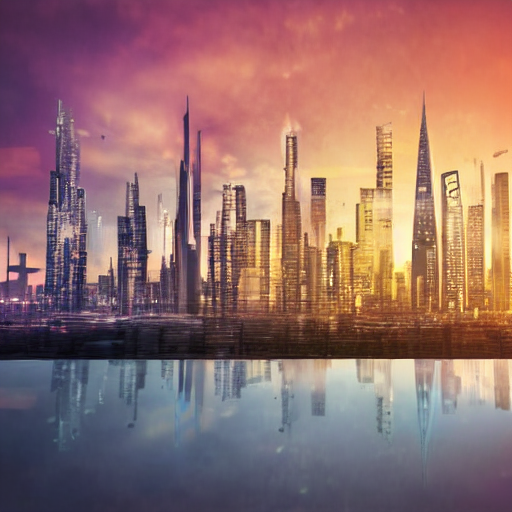

In [9]:
from IPython.display import display, Image

# Display the image file directly from saved location
display(Image(filename="generated_image.png"))
